# Model comparison: logistic vs. random forest classifier

In [1]:
%%html
<style>
table {float:left}
</style>

> **Quick info:** <br>
>
> This notebook demonstrates how to use the three output files (`<classifier>_model.pkl`, `cls_report.pkl`, `confusion_matrix.npy`) produced by running `train_classifier.py` from the command line. These files allow for loading the model and inspecting its performance on a hold-out set.
>
> |             | logit | random forest |
> | ----------: | ----: | ------------: |
> |    micro-F1 |  0.62 |          0.48 |
> |    macro-F1 |  0.49 |          0.15 |
> | weighted-F1 |  0.63 |          0.39 |
> |  samples-F1 |  0.49 |          0.37 |

In [2]:
!tree ../experiments

../experiments
|-- logit_2021-12-19_19-23-37
|   |-- cls_report.pkl
|   |-- confusion_matrices.npy
|   `-- logit_model.pkl
`-- random_forest_2021-12-19_20-51-13
    |-- cls_report.pkl
    |-- confusion_matrices.npy
    `-- random_forest_model.pkl

2 directories, 6 files


In [3]:
import joblib
import web_app
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._classification import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

## The logit model

### Load model

In [5]:
logit_model = joblib.load('../experiments/logit_2021-12-19_19-23-37/logit_model.pkl')

### Hyperparameters

#### Display the pre-defined parameter grid

In [6]:
logit_model.param_distributions

{'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000),
 'tfidf__use_idf': (True, False),
 'clf__estimator__C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
        3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
        1.29154967e+03, 1.00000000e+04])}

#### Display the best combination of hyperparameters

In [7]:
logit_model.best_params_

{'vect__ngram_range': (1, 2),
 'vect__max_features': None,
 'vect__max_df': 0.5,
 'tfidf__use_idf': False,
 'clf__estimator__C': 2.782559402207126}

### Display the classification report

In [8]:
with open('../experiments/logit_2021-12-19_19-23-37/cls_report.pkl', 'rb') as handle:
    logit_report = pickle.load(handle)
    
df = pd.DataFrame.from_dict(logit_report)
df.T

,precision,recall,f1-score,support
request,0.672962,0.774600,0.720213,874.0
offer,0.052632,0.041667,0.046512,24.0
aid_related,0.749428,0.757044,0.753217,2165.0
medical_help,0.399638,0.535109,0.457557,413.0
medical_products,0.394330,0.581749,0.470046,263.0
search_and_rescue,0.222772,0.338346,0.268657,133.0
security,0.173913,0.160000,0.166667,100.0
military,0.403571,0.676647,0.505593,167.0
water,0.636364,0.850467,0.728000,321.0
food,0.766193,0.849387,0.805648,571.0


### Display the confusion matrices

In [9]:
# load the label categories:
categories = [cat.replace('_', ' ') for cat in df.columns if not 'avg' in cat]

In [10]:
logit_conf_matrices = np.load('../experiments/logit_2021-12-19_19-23-37/confusion_matrices.npy')

#### Plot a single confusion matrix for the `request` category

Text(0.5, 1.0, 'request')

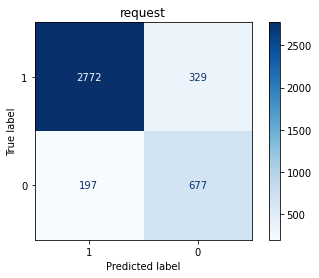

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=logit_conf_matrices[0],
                              display_labels=None)
disp.display_labels = [1, 0]
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title(categories[0])

#### Display all confusion matrices in text format

In [12]:
for label, matrix in zip(categories, logit_conf_matrices):
    print(f'{label}\n{matrix}\n')

request
[[2772  329]
 [ 197  677]]

offer
[[3933   18]
 [  23    1]]

aid related
[[1262  548]
 [ 526 1639]]

medical help
[[3230  332]
 [ 192  221]]

medical products
[[3477  235]
 [ 110  153]]

search and rescue
[[3685  157]
 [  88   45]]

security
[[3799   76]
 [  84   16]]

military
[[3641  167]
 [  54  113]]

water
[[3498  156]
 [  48  273]]

food
[[3256  148]
 [  86  485]]

shelter
[[3306  219]
 [ 117  333]]

clothing
[[3848   39]
 [  28   60]]

money
[[3740  109]
 [  57   69]]

missing people
[[3870   40]
 [  43   22]]

refugees
[[3610  185]
 [  81   99]]

death
[[3573  167]
 [  73  162]]

other aid
[[2609  632]
 [ 338  396]]

infrastructure related
[[3205  402]
 [ 207  161]]

transport
[[3511  189]
 [ 160  115]]

buildings
[[3465  216]
 [  91  203]]

electricity
[[3801   84]
 [  26   64]]

tools
[[3934   18]
 [  22    1]]

hospitals
[[3858   48]
 [  46   23]]

shops
[[3935    9]
 [  28    3]]

aid centers
[[3826   83]
 [  45   21]]

other infrastructure
[[3421  309]
 [ 149   96

## The random forest model

### Load model

In [13]:
rf_model = joblib.load('../experiments/random_forest_2021-12-19_20-51-13/random_forest_model.pkl')

### Hyperparameters

#### Display the pre-defined parameter grid

In [14]:
rf_model.param_distributions

{'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000),
 'tfidf__use_idf': (True, False),
 'clf__n_estimators': [50, 100, 200],
 'clf__min_samples_split': [3, 4, 5]}

#### Display the best combination of hyperparameters

In [16]:
rf_model.best_params_

{'vect__ngram_range': (1, 1),
 'vect__max_features': 5000,
 'vect__max_df': 0.5,
 'tfidf__use_idf': True,
 'clf__n_estimators': 50,
 'clf__min_samples_split': 5}

### Display the classification report

In [17]:
with open('../experiments/random_forest_2021-12-19_20-51-13/cls_report.pkl', 'rb') as handle:
    rf_report = pickle.load(handle)
    
df2 = pd.DataFrame.from_dict(rf_report)
df2.T

,precision,recall,f1-score,support
request,0.748603,0.613272,0.674214,874.0
offer,0.000000,0.000000,0.000000,24.0
aid_related,0.596148,0.943649,0.730687,2165.0
medical_help,0.454545,0.012107,0.023585,413.0
medical_products,0.470588,0.030418,0.057143,263.0
search_and_rescue,0.000000,0.000000,0.000000,133.0
security,0.000000,0.000000,0.000000,100.0
military,0.000000,0.000000,0.000000,167.0
water,0.954545,0.261682,0.410758,321.0
food,0.880435,0.425569,0.573790,571.0


### Display the confusion matrices

In [18]:
rf_conf_matrices = np.load('../experiments/random_forest_2021-12-19_20-51-13/confusion_matrices.npy')

#### Plot a single confusion matrix for the `request` category

Text(0.5, 1.0, 'request')

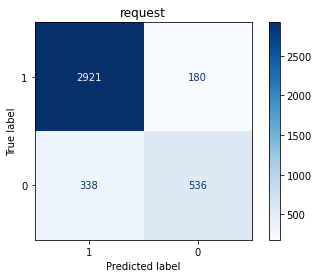

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrices[0],
                              display_labels=None)
disp.display_labels = [1, 0]
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title(categories[0])

#### Display all confusion matrices in text format

In [20]:
for label, matrix in zip(categories, rf_conf_matrices):
    print(f'{label}\n{matrix}\n')

request
[[2921  180]
 [ 338  536]]

offer
[[3951    0]
 [  24    0]]

aid related
[[ 426 1384]
 [ 122 2043]]

medical help
[[3556    6]
 [ 408    5]]

medical products
[[3703    9]
 [ 255    8]]

search and rescue
[[3839    3]
 [ 133    0]]

security
[[3873    2]
 [ 100    0]]

military
[[3808    0]
 [ 167    0]]

water
[[3650    4]
 [ 237   84]]

food
[[3371   33]
 [ 328  243]]

shelter
[[3518    7]
 [ 400   50]]

clothing
[[3886    1]
 [  85    3]]

money
[[3845    4]
 [ 123    3]]

missing people
[[3907    3]
 [  65    0]]

refugees
[[3791    4]
 [ 179    1]]

death
[[3734    6]
 [ 224   11]]

other aid
[[3222   19]
 [ 717   17]]

infrastructure related
[[3603    4]
 [ 363    5]]

transport
[[3693    7]
 [ 274    1]]

buildings
[[3680    1]
 [ 284   10]]

electricity
[[3884    1]
 [  90    0]]

tools
[[3952    0]
 [  23    0]]

hospitals
[[3906    0]
 [  68    1]]

shops
[[3944    0]
 [  31    0]]

aid centers
[[3909    0]
 [  66    0]]

other infrastructure
[[3728    2]
 [ 244    1